In [4]:
%matplotlib inline

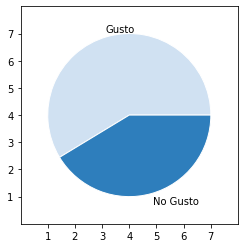

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#leemos el dataset
attributes_spotify = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")

#eliminamos columnas que no se utilizaran
attributes_spotify.drop('Unnamed: 0', inplace=True, axis=1)
attributes_spotify.drop('song_title', inplace=True, axis=1)
attributes_spotify.drop('artist', inplace=True, axis=1)

# Split del dataset en 50% para entrenar y 50% para testear
X_train, X_test, y_train, y_test = train_test_split(
    attributes_spotify, attributes_spotify.target, test_size=0.5
)

# ejecucion del modelo
knn = KNeighborsClassifier(9)
knn.fit(X_train, y_train)
predicted = knn.predict(X_test)

result = [0, 0]

# separo la cantidad de canciones que gustaron/no gustaron
for p in predicted:
    if(p == 1):
        result[0] += 1
    else:
        result[1] += 1

# visualizacion de datos
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(result)))

fig, ax = plt.subplots()

ax.pie(result, colors=colors, radius=3, center=(4, 4), labels=['Gusto', 'No Gusto'],
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()